<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

# Problem Statement

Real estate was once considered a relatively safe harbor, an asset class marked by steady value creation and predictable trends. Those days are over. New technologies and urgent sustainability concerns are now disrupting the industry in ways that raise the stakes for every home buyer and seller.

A realty company that does property sale listings for home sellers, is looking into using Machine Learning to help their clients to predict the sale prices of their homes. With the help of a good prediction model, the company will be able to help clients set a more accurate and realistic price for their home sales. As part of the realty's data science team, we have been tasked with using Machine Learning to build a house sale price prediction model based on the Ames Housing Dataset collected from 2006 to 2010. This dataset contains a total of 2051 rows and 81 columns of data.

# Part 2: Pre-processing and Feature Engineering

## Table of Contents:
- [Datasets Used](#Datasets-Used)
- [Import Libraries and Set Options](#Import-Libraries-and-Set-Options)
- [Functions](#Functions)
- [Data Import](#Data-Import)
- [Feature Engineering](#Feature-Engineering)
- [Feature Selection](#Feature-Selection)

## Datasets Used

The following preprocessed datasets in [`datasets`](../datasets/) folder will be used for in this notebook

* [`train_clean.csv`](../datasets/train_clean.csv): (2016 - 2010) Pre-processed Ames Housing dataset
* [`test_clean.csv`](../datasets/clean.csv): (2016 - 2010) Pre-processed Ames Housing dataset, excluding target variable

## Import Libraries and Set Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# allow pandas to display all columns as dataset has a total of 81 columns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

## Functions

In [3]:
def scatter(df, x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.scatter(df[x], df[y], s = 10)
    line = mlines.Line2D([0, 1], [0, 1], color = 'red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    ax.set_title(title, fontsize = 15) #Set title 
    ax.set_xlabel(xlabel, fontsize = 12) #Set xlabel 
    ax.set_ylabel(ylabel, fontsize = 12) #Set ylabel 
    plt.show()

In [4]:
def heatmap(df, col_list):
    plt.figure(figsize = (10,6))
    corr = df[col_list].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'coolwarm', vmin = 0, vmax=1, annot = True);

In [5]:
def heatmap_wo_v(df, col_list):
    plt.figure(figsize = (10,6))
    corr = df[col_list].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True);

In [6]:
def bigheatmap(df, col_list):
    plt.figure(figsize = (30,20))
    corr = df[col_list].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'coolwarm', vmin = 0, vmax=1, annot = True);

In [7]:
def bigheatmap_wo_v(df, col_list):
    plt.figure(figsize = (30,20))
    corr = df[col_list].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True);

In [8]:
# Function for plotting histogram of residuals
def resid_histogram(model, X, y, period=''):
    '''
    model: fitted model
    X: Matrix of explanatory variables
    y: Dependant variable
    period: String describing data coverage period
    '''

    yhat = model.predict(X)
    residuals = y - yhat

    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(residuals, bins=50, kde=True, ax=ax)
    plt.title(f'OLS Residuals, {period}', fontsize=18);

In [9]:
def add_location(x):
    if 'MeadowV' in x or 'IDOTRR' in x or 'BrDale' in x or 'OldTown' in x or 'Edwards' in x:
        return 1
    elif 'BrkSide' in x or 'Sawyer' in x or 'SWISU' in x or 'Blueste' in x or 'Landmrk' in x: 
        return 2
    elif 'NAmes' in x or 'NPkVill' in x or 'Mitchel' in x or 'Gilbert' in x or 'SawyerW' in x or 'NWAmes' in x:
        return 3
    elif 'Greens' in x or 'Blmngtn' in x or 'Crawfor' in x or 'CollgCr' in x or 'Timber' in x or 'Somerst' in x:
        return 4
    elif 'ClearCr' in x or 'Veenker' in x or 'GrnHill' in x or 'NoRidge' in x or 'NridgHt' in x or 'StoneBr' in x:
        return 5

## Data Import

In [10]:
train = pd.read_csv('../datasets/train_clean.csv')
test = pd.read_csv('../datasets/test_clean.csv')

## Feature Engineering
Insights from EDA and Cleaning section will be used to engineer the features of the Ames Housing dataset.

### Transforming and Manufacturing Features

### Feature: house_age (Discrete)

In [11]:
train['house_age'] = train['yr_sold'] + train['year_built']
test['house_age'] = test['yr_sold'] + test['year_built']

In [12]:
train.drop('year_built', axis=1, inplace = True)
test.drop('year_built', axis=1, inplace = True)

### Feature: house_area (continuous)
A higher total usable house area in square feet (gound living area + basement area) usually means a higher appraised / sale value. Hence, we will create a new feature `house_area` by adding `total_bsmt_sf` and `gr_liv_area` and check its correlation with `saleprice`.

In [13]:
train['house_area'] = train['total_bsmt_sf'] + train['gr_liv_area']
test['house_area'] = test['total_bsmt_sf'] + test['gr_liv_area']

In [14]:
area_sp = ['saleprice', 'gr_liv_area', 'total_bsmt_sf', 'house_area']

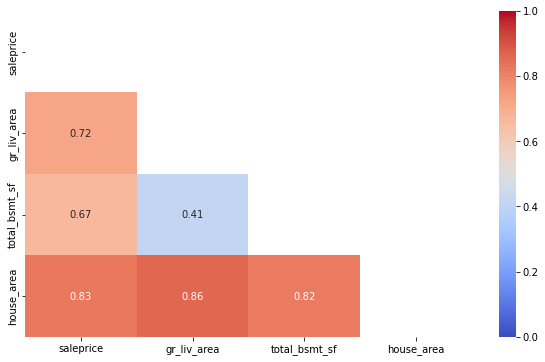

In [15]:
heatmap(train, area_sp)

The heatmap shows a strong positive correlation between `house_area` and `saleprice`. This correlation is even higher than that of `gr_liv_area` and `saleprice`. Since `house_area` was created, we can drop features that were used to create it.

We will now do a pairplot to identify the distribution and correlation between saleprice and each of these features, as well as collinearity between features.

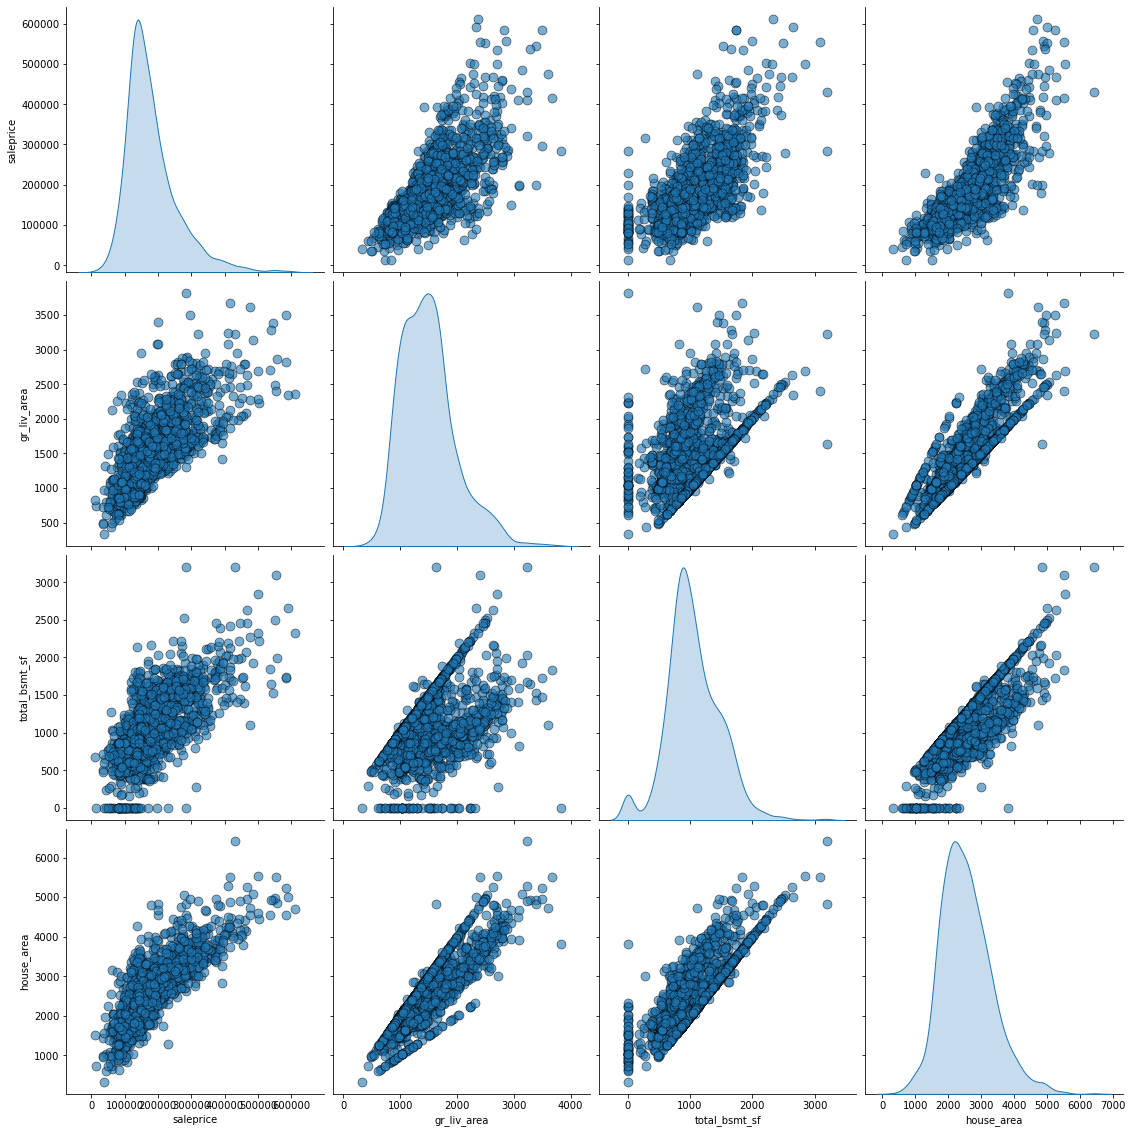

In [16]:
sns.pairplot(train[area_sp], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

The above pairplot confirms that `house_area` has the best linear relationship with saleprice and because it was created by using `total_bsmt_sf`, and `gr_liv_area`. Because of this collinearity between the `house_area` and these features, we need to drop `gr_liv_area`, `1st_flr_sf`, `2nd_flr_sf`, `total_bsmt_sf`, `bsmtfin_sf_1`, `bsmtfin_sf_2`, `bsmt_unf_sf`.

In [17]:
train.drop(columns=['gr_liv_area', '1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 
                   'bsmtfin_sf_2', 'bsmt_unf_sf'], inplace = True)

test.drop(columns=['gr_liv_area', '1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 
                   'bsmtfin_sf_2', 'bsmt_unf_sf'], inplace = True)


### Feature: location (ordinal)

As mentioned in the <b>01_EDA_and_Cleaning.ipynb</b> file, although `neighborhood` is a good predictor of `saleprice`, it also has a total of 28 unique categories. Half of these categories have less than 50 out of 2051 observations. By using dummy variable encoding, we will generate 27 more features. Also, this would cause multicollinearity as the distribution of saleprice is similar for some categories in neighborhood.

It is known to most people that the `location` of a property will affect the saleprice. A more desirable `location` will demand a higher `saleprice`. To simplify things, we will construct an ordinal location feature by grouping these 28 neighborhoods into 5 ordinal categories based on the median saleprice of the neighborhood. (Tried different numbers of categories, and 5 gave a better scoring model than 4 categories)

These categories will be:
 1 (low) 
 2 (mid-low) 
 3 (mid)
 4 (mid-high)
 5 (high)

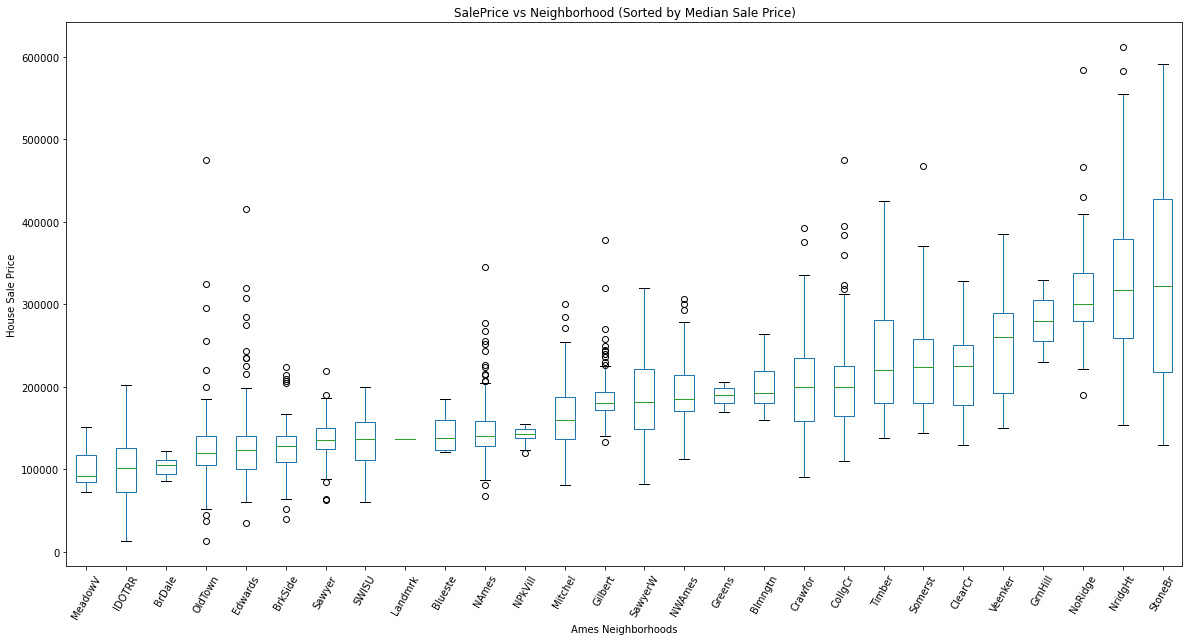

In [18]:
# Visualize neighbourhood vs saleprice boxplot sorted by median saleprice in descending order
# create the sorted dataframe

grouped = train.groupby(['neighborhood'])
df = pd.DataFrame({col:vals['saleprice'] for col, vals in grouped})

sorted_median = df.median()
sorted_median.sort_values(inplace = True)
df = df[sorted_median.index]

# generate boxplot
plt.figure(figsize=(20,10))

df.boxplot(grid = False, rot = 60)
plt.title('SalePrice vs Neighborhood (Sorted by Median Sale Price)')
plt.xlabel('Ames Neighborhoods')
plt.ylabel('House Sale Price');

plt.savefig('../charts/neighborhood_boxplot.jpg')

Group `neighborhood` into low, midlow, midhigh, and high and retreive indices of each group so that the ratings can be assigned accordingly.

In [19]:
train['location'] = train.neighborhood.map(add_location)
test['location'] = test.neighborhood.map(add_location)

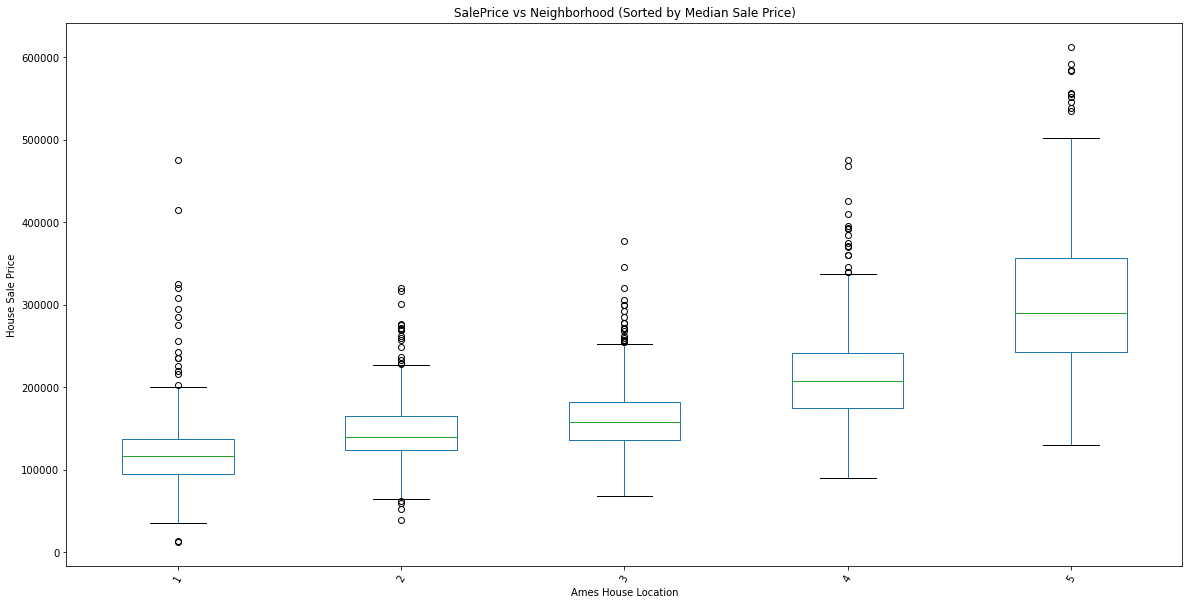

In [20]:
# Visualize neighbourhood vs saleprice boxplot sorted by median saleprice in descending order
# create the sorted dataframe
grouped = train.groupby(['location'])
df = pd.DataFrame({col:vals['saleprice'] for col, vals in grouped})

# generate boxplot
plt.figure(figsize=(20,10))

df.boxplot(grid = False, rot = 60)
plt.title('SalePrice vs Neighborhood (Sorted by Median Sale Price)')
plt.xlabel('Ames House Location')
plt.ylabel('House Sale Price');

plt.savefig('../charts/location_boxplot.jpg')

In [21]:
location_df = train[['neighborhood', 'location']]
location_df.head(10)

neighborhood  location
0       Sawyer         2
1      SawyerW         2
2        NAmes         3
3       Timber         4
4      SawyerW         2
5        NAmes         3
6      Edwards         1
7        NAmes         3
8      OldTown         1
9        NAmes         3

In [22]:
test['location'].value_counts()

3    264
4    206
1    174
2    130
5    104
Name: location, dtype: int64

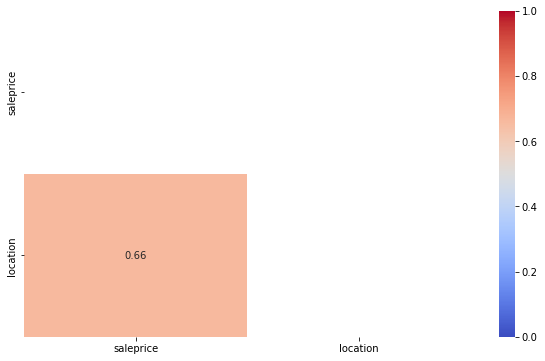

In [23]:
location_sp = ['saleprice', 'location']

heatmap(train, location_sp)

There is a high correlation coefficient between `saleprice` and `location`.

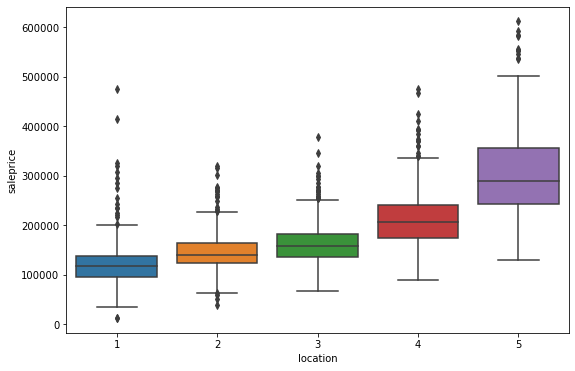

In [24]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'location', y = 'saleprice', data = train)
plt.show()

We can now drop `neighborhood` since `location` has been created to replace it.

In [25]:
train.drop(columns=['neighborhood'], inplace=True)
test.drop(columns=['neighborhood'], inplace=True)

### Feature: total_bath (discrete)
The number of bathrooms can affect sale price. Therefore, we would like to check how we can best create new features from existing features, and then compare the correlation coefficient of these new features vs saleprice, with the old features vs saleprice.

In [26]:
train['total_full_bath'] = train['bsmt_full_bath'] + train['full_bath']
train['total_half_bath'] = train['bsmt_half_bath'] + train['half_bath']
train['total_bath'] = train['total_full_bath'] + train['total_half_bath']*0.5

test['total_full_bath'] = test['bsmt_full_bath'] + test['full_bath']
test['total_half_bath'] = test['bsmt_half_bath'] + test['half_bath']
test['total_bath'] = test['total_full_bath'] + test['total_half_bath']*0.5

In [27]:
bathroom_sp = ['saleprice', 'total_bath', 'total_full_bath', 'total_half_bath', 'bsmt_full_bath', 
               'bsmt_half_bath', 'full_bath', 'half_bath']

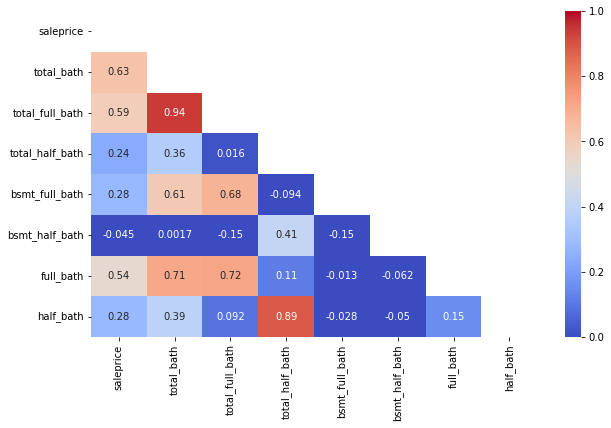

In [28]:
heatmap(train, bathroom_sp)

From the heatmap, it seems like `total_bath` has the strongest correlation coefficient with `saleprice`. We can therefore drop the other features which the new feature is created from.

In [29]:
train.drop(columns=['total_full_bath', 'total_half_bath', 'bsmt_full_bath', 'bsmt_half_bath', 
                   'full_bath', 'half_bath'], inplace=True)
test.drop(columns=['total_full_bath', 'total_half_bath', 'bsmt_full_bath', 'bsmt_half_bath', 
                   'full_bath', 'half_bath'], inplace=True)

### Saleprice Log Transformation
As mentioned in the EDA and Cleaning notebook, the distribution of the target variable `saleprice` deviates from the normal distribution and is right-skewed. This indicates that the dataset contains alot of outliers. Also, a quick look a the statistics of `saleprice` also shows that the standard deviation is high. As is is important for linear models to have normally distributed data , we need to transform `saleprice` to make it more normally distributed.

In [30]:
train['saleprice'].describe()

count      2048.000000
mean     181449.466797
std       79303.993439
min       12789.000000
25%      129725.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

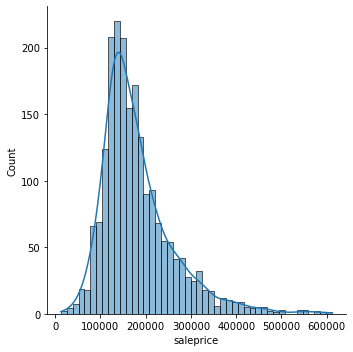

In [31]:
sns.displot(train['saleprice'], kde = True);

In [32]:
train['saleprice'] = np.log(train['saleprice'])

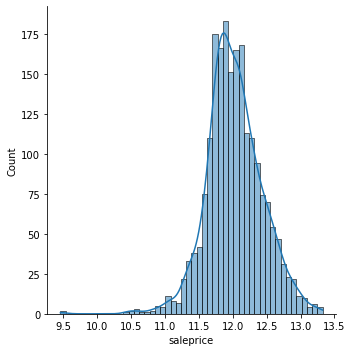

In [33]:
#Check new distribution of saleprice
sns.displot(train['saleprice'], kde = True);

`saleprice` is now more normally distributed.

### Drop Irrelevant Features
`pid` and `id` are unique identifiers that are totally irrelevant with `saleprice`, however, kaggle submissions require the use of `id`, hence we should remove `pid`.

In [34]:
train.drop(columns=['pid'], inplace=True)
test.drop(columns=['pid'], inplace=True)

### Drop Meaningless Features 
Features where > 80% of the observations are in the NA category such as `pool_qc`, `pool_area`, `misc_feature`, `misc_val`, `alley` and `fence` will not give a meaningful prediction.

Features that are considered 'duplicated':
`exterior_1` and `exterior_2` are materials that cover the exterior of the houses.

Similarly, `roof_matl` is part of the exterior of the house, we can remove this feature.

In [35]:
train.drop(columns=['pool_qc', 'pool_area', 'misc_feature', 'misc_val', 'alley', 'fence'], inplace=True)
train.drop(columns=['exterior_1st', 'exterior_2nd'], inplace=True)
train.drop(columns=['roof_matl'], inplace=True)

test.drop(columns=['pool_qc', 'pool_area', 'misc_feature', 'misc_val', 'alley', 'fence'], inplace=True)
test.drop(columns=['exterior_1st', 'exterior_2nd'], inplace=True)
test.drop(columns=['roof_matl'], inplace=True)


### Drop Features with Multicollinearity
Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.

Correlation between a predictor and target variable is a good indication of better predictability. But, correlation among the predictors is a problem to be rectified to be able to come up with a reliable model.([*source*](https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a))

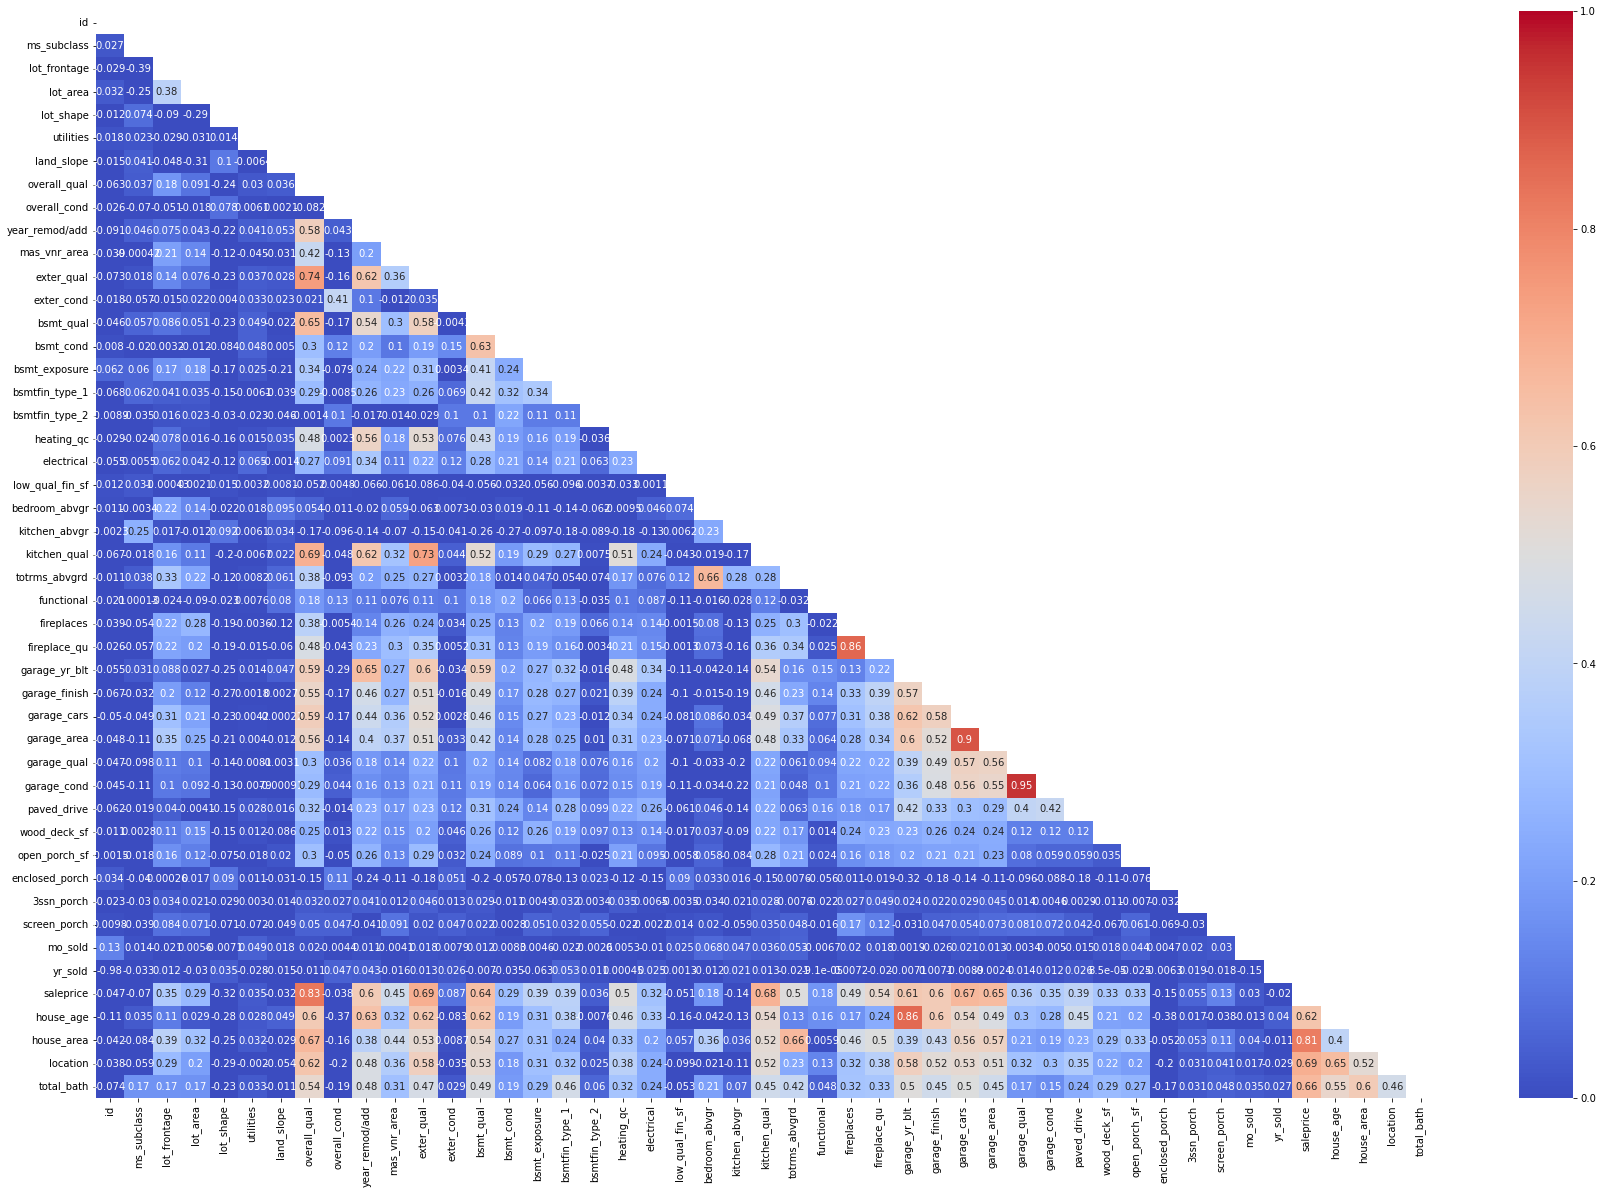

In [36]:
bigheatmap(train, train.columns)

Features with strong correlation (> 0.7) with listed feature other than `saleprice`:<br>

`overall_qual`: 'exter_qual' 

`fireplace_qu`: 'fireplaces'

`garage_area`: 'garage_cars'

`garage_qual`: 'garage_cond'


In [37]:
train.drop(columns=['exter_qual', 'garage_cars', 'garage_cond', 'fireplaces'], inplace=True)
test.drop(columns=['exter_qual', 'garage_cars', 'garage_cond', 'fireplaces'], inplace=True)

In [38]:
numerical = ['house_area', 'lot_frontage', 'lot_area', 'total_bath', 'garage_area', 'garage_yr_blt', 'house_age', 
                     'year_remod/add', 'kitchen_abvgr', 'totrms_abvgrd', 'bedroom_abvgr', 'mas_vnr_area', 
                     'low_qual_fin_sf', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']

ordinal = ['lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'overall_qual', 'overall_cond', 
           'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 
           'bsmtfin_type_2','heating_qc', 'electrical',  'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish',
           'garage_qual', 'paved_drive', 'location']

categorical_features = ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config', 'condition_1', 
                        'condition_2', 'bldg_type', 'house_style', 'roof_style', 'mas_vnr_type', 'foundation', 'heating', 
                        'central_air', 'garage_type', 'sale_type', 'mo_sold', 'yr_sold']

In [39]:
train.to_csv('../datasets/train_nodummy.csv', index = False)
test.to_csv('../datasets/test_nodummy.csv', index = False)

### Dummy Encoding for Nominal (Categorical) Features

In [40]:
train = pd.get_dummies(train, columns = categorical_features, drop_first = True)
test = pd.get_dummies(test, columns = categorical_features, drop_first = True)

In [41]:
train.shape

(2048, 142)

`test` has less columns than train now because the observations do not fall into all categories. Hence, when dummified, it will have less columns.

In [42]:
test.shape

(878, 135)

In [43]:
train.to_csv('../datasets/train_preprocessed.csv', index = False)
test.to_csv('../datasets/test_preprocessed.csv', index = False)

## Feature Selection


### Pearson Correlation
We will use Pearson Correlation coefficient to measure the correlation between features and `saleprice` based on a threshold that we set.

In [44]:
train_coeff = pd.read_csv('../datasets/train_nodummy.csv')

In [45]:
train_coeff['location'].value_counts()

3    611
4    454
1    416
2    313
5    254
Name: location, dtype: int64

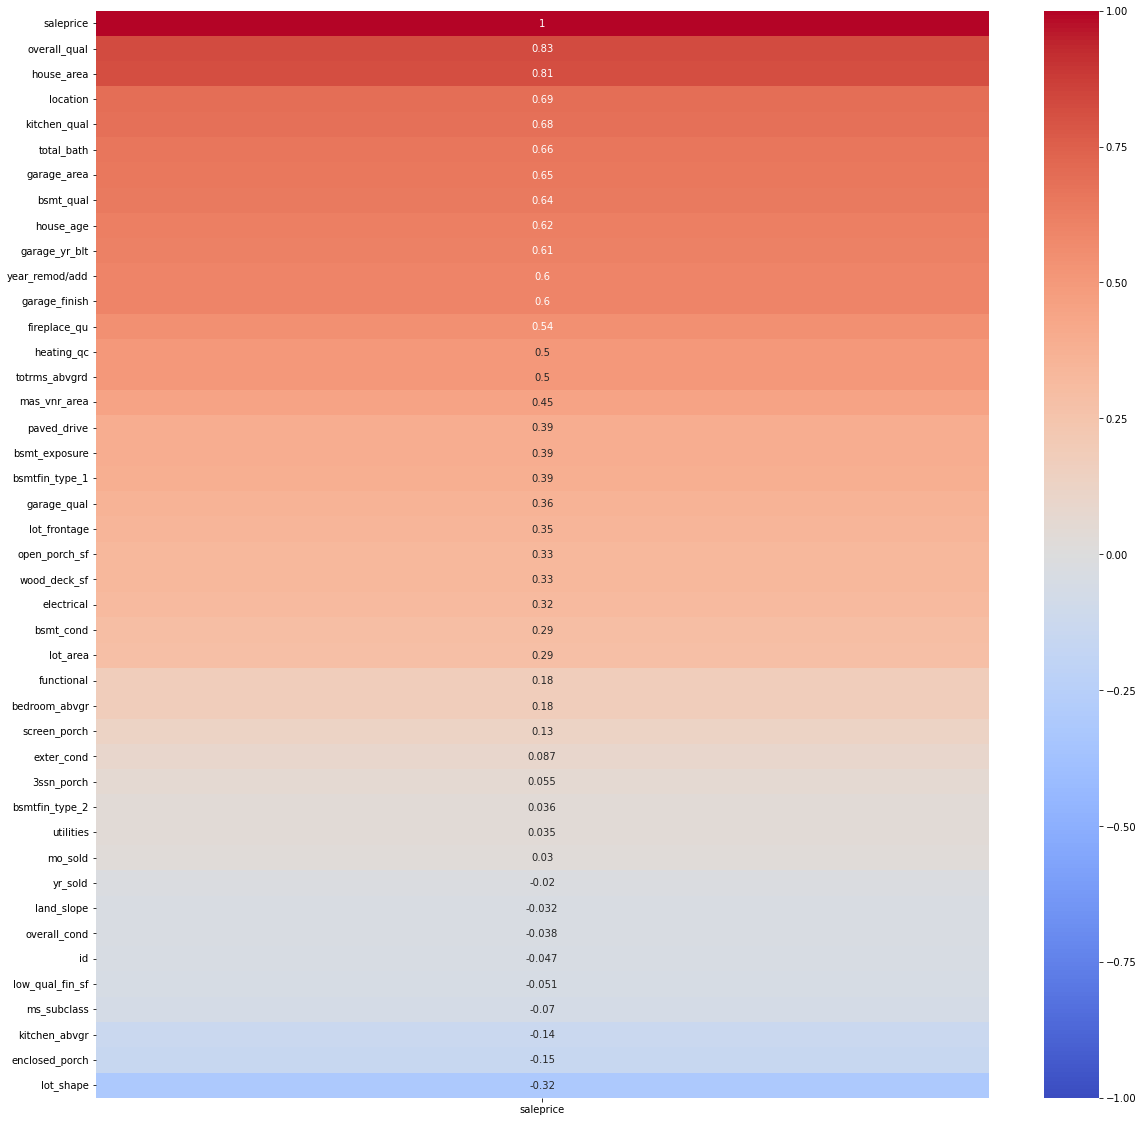

In [46]:
# take a look at the correlation between numerical columns and saleprice
plt.figure(figsize = (20, 20))
sns.heatmap(train_coeff.corr()[['saleprice']].sort_values('saleprice', ascending = False), 
            annot=True, cmap ='coolwarm', 
            vmin=-1, vmax=1); 

plt.savefig('../charts/numerical_heatmap.jpg')

For the numerical features, we will select features based on a coeff  threshold of 0.30

In [47]:
corr = train_coeff.corr()
#Correlation with output variable
corr_target = abs(corr["saleprice"])
#Selecting highly correlated features
select_features = corr_target[corr_target>=0.30]
select_features

lot_frontage      0.349094
lot_shape         0.317751
overall_qual      0.825574
year_remod/add    0.599592
mas_vnr_area      0.448704
bsmt_qual         0.642769
bsmt_exposure     0.391694
bsmtfin_type_1    0.385711
heating_qc        0.501879
electrical        0.315947
kitchen_qual      0.682973
totrms_abvgrd     0.501026
fireplace_qu      0.542140
garage_yr_blt     0.609905
garage_finish     0.598381
garage_area       0.654827
garage_qual       0.363477
paved_drive       0.393269
wood_deck_sf      0.331293
open_porch_sf     0.332710
saleprice         1.000000
house_age         0.623785
house_area        0.813681
location          0.694247
total_bath        0.661163
Name: saleprice, dtype: float64

We will also use a threshold of coefficient of >= 0.30 for numerical features against saleprice. Features that can be included into the prediction model are:<br>'lot_frontage', 'lot_shape', 'overall_qual', 'year_remod/add', 'mas_vnr_area', 'bsmt_qual', 'electrical', 'wood_deck_sf', 'open_porch_sf', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'kitchen_qual', 'totrms_abvgrd', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_area', 'garage_qual', 'paved_drive', 'house_age', 'house_area', 'location' and 'total_bath'

In [48]:
numerical = ['overall_qual', 'year_remod/add', 'mas_vnr_area', 'bsmt_qual', 'bsmt_exposure', 'heating_qc', 'kitchen_qual', 
            'totrms_abvgrd', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_area', 'paved_drive', 'house_age', 
             'location', 'total_bath']

We will now split these features based on those which need to be scaled (continuous and discrete), and those which do not need to be scaled (ordinal).

In [49]:
numerical = ['house_area', 'total_bath', 'garage_area', 'house_age', 'year_remod/add', 'totrms_abvgrd', 
                     'fireplaces', 'mas_vnr_area']

ordinal = ['overall_qual', 'location', 'kitchen_qual', 'bsmt_qual', 'garage_finish', 'fireplace_qu', 'heating_qc', 
           'paved_drive', 'bsmt_exposure']

categorical_features = ['ms_subclass', 'ms_zoning', 'street', 'land_contour', 'lot_config', 'condition_1', 
                        'condition_2', 'bldg_type', 'house_style', 'roof_style', 'mas_vnr_type', 'foundation', 'heating', 
                        'central_air', 'garage_type', 'sale_type', 'mo_sold', 'yr_sold']

In [50]:
#create another df to dummify categorical features for coeff check.
dummy_check = train_coeff[train_coeff.columns.tolist()]
dummy_check

id  ms_subclass ms_zoning  lot_frontage  lot_area street  lot_shape  \
0      109           60        RL          70.0     13517   Pave          3   
1      544           60        RL          43.0     11492   Pave          3   
2      153           20        RL          68.0      7922   Pave          4   
3      318           60        RL          73.0      9802   Pave          4   
4      255           50        RL          82.0     14235   Pave          3   
...    ...          ...       ...           ...       ...    ...        ...   
2043  1587           20        RL          79.0     11449   Pave          3   
2044   785           30        RL          63.0     12342   Pave          3   
2045   916           50        RL          57.0      7558   Pave          4   
2046   639           20        RL          80.0     10400   Pave          4   
2047    10           60        RL          60.0      7500   Pave          4   

     land_contour  utilities lot_config  land_slope condition_1 condition_2  \
0             Lvl          4    CulDSac           3        RRAe        Norm   
1             Lvl          4    CulDSac           3        Norm        Norm   
2             Lvl          4     Inside           3        Norm        Norm   
3             Lvl          4     Inside           3        Norm        Norm   
4             Lvl          4     Inside           3        Norm        Norm   
...           ...        ...        ...         ...         ...         ...   
2043          HLS          4     Inside           3        Norm        Norm   
2044          Lvl          4     Inside           3        Norm        Norm   
2045          Bnk          4     Inside           3        Norm        Norm   
2046          Lvl          4     Corner           3        Norm        Norm   
2047          Lvl          4     Inside           3        Norm        Norm   

     bldg_type house_style  overall_qual  overall_cond  year_remod/add  \
0         1Fam      2Story             6             8            2005   
1         1Fam      2Story             7             5            1997   
2         1Fam      1Story             5             7            2007   
3         1Fam      2Story             5             5            2007   
4         1Fam      1.5Fin             6             8            1993   
...        ...         ...           ...           ...             ...   
2043      1Fam      1Story             8             5            2007   
2044      1Fam      1Story             4             5            1950   
2045      1Fam      1.5Fin             6             6            1950   
2046      1Fam      1Story             4             5            1956   
2047      1Fam      2Story             7             5            1999   

     roof_style mas_vnr_type  mas_vnr_area  exter_cond foundation  bsmt_qual  \
0         Gable      BrkFace         289.0           3     CBlock          3   
1         Gable      BrkFace         132.0           3      PConc          4   
2         Gable         None           0.0           4     CBlock          3   
3         Gable         None           0.0           3      PConc          4   
4         Gable         None           0.0           3      PConc          2   
...         ...          ...           ...         ...        ...        ...   
2043      Gable         None           0.0           3      PConc          4   
2044      Gable         None           0.0           3     CBlock          3   
2045      Gable         None           0.0           3     BrkTil          3   
2046      Gable         None           0.0           3     CBlock          3   
2047      Gable         None           0.0           3      PConc          3   

      bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2 heating  \
0             3              1               6               1    GasA   
1             3              1               6               1    GasA   
2             3              1        

In [51]:
dummy_check = pd.get_dummies(dummy_check, columns = categorical_features, drop_first = True)

In [52]:
print(dummy_check.columns.tolist())

['id', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'year_remod/add', 'mas_vnr_area', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'low_qual_fin_sf', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_area', 'garage_qual', 'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'saleprice', 'house_age', 'house_area', 'location', 'total_bath', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190', 'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'street_Pave', 

In [53]:
dummy_coeff = dummy_check[['saleprice', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190', 'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'street_Pave', 'land_contour_HLS', 'land_contour_Low', 'land_contour_Lvl', 'lot_config_CulDSac', 'lot_config_FR2', 'lot_config_FR3', 'lot_config_Inside', 'condition_1_Feedr', 'condition_1_Norm', 'condition_1_PosA', 'condition_1_PosN', 'condition_1_RRAe', 'condition_1_RRAn', 'condition_1_RRNe', 'condition_1_RRNn', 'condition_2_Feedr', 'condition_2_Norm', 'condition_2_PosA', 'condition_2_PosN', 'condition_2_RRAe', 'condition_2_RRAn', 'condition_2_RRNn', 'bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE', 'house_style_1.5Unf', 'house_style_1Story', 'house_style_2.5Fin', 'house_style_2.5Unf', 'house_style_2Story', 'house_style_SFoyer', 'house_style_SLvl', 'roof_style_Gable', 'roof_style_Gambrel', 'roof_style_Hip', 'roof_style_Mansard', 'roof_style_Shed', 'mas_vnr_type_BrkFace', 'mas_vnr_type_None', 'mas_vnr_type_Stone', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone', 'foundation_Wood', 'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall', 'central_air_Y', 'garage_type_Attchd', 'garage_type_Basment', 'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd', 'garage_type_None', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_WD ', 'mo_sold_2', 'mo_sold_3', 'mo_sold_4', 'mo_sold_5', 'mo_sold_6', 'mo_sold_7', 'mo_sold_8', 'mo_sold_9', 'mo_sold_10', 'mo_sold_11', 'mo_sold_12', 
                           'yr_sold_2007', 'yr_sold_2008', 'yr_sold_2009', 'yr_sold_2010']]

We will now look at coeff between dummified categorical features against `saleprice`.

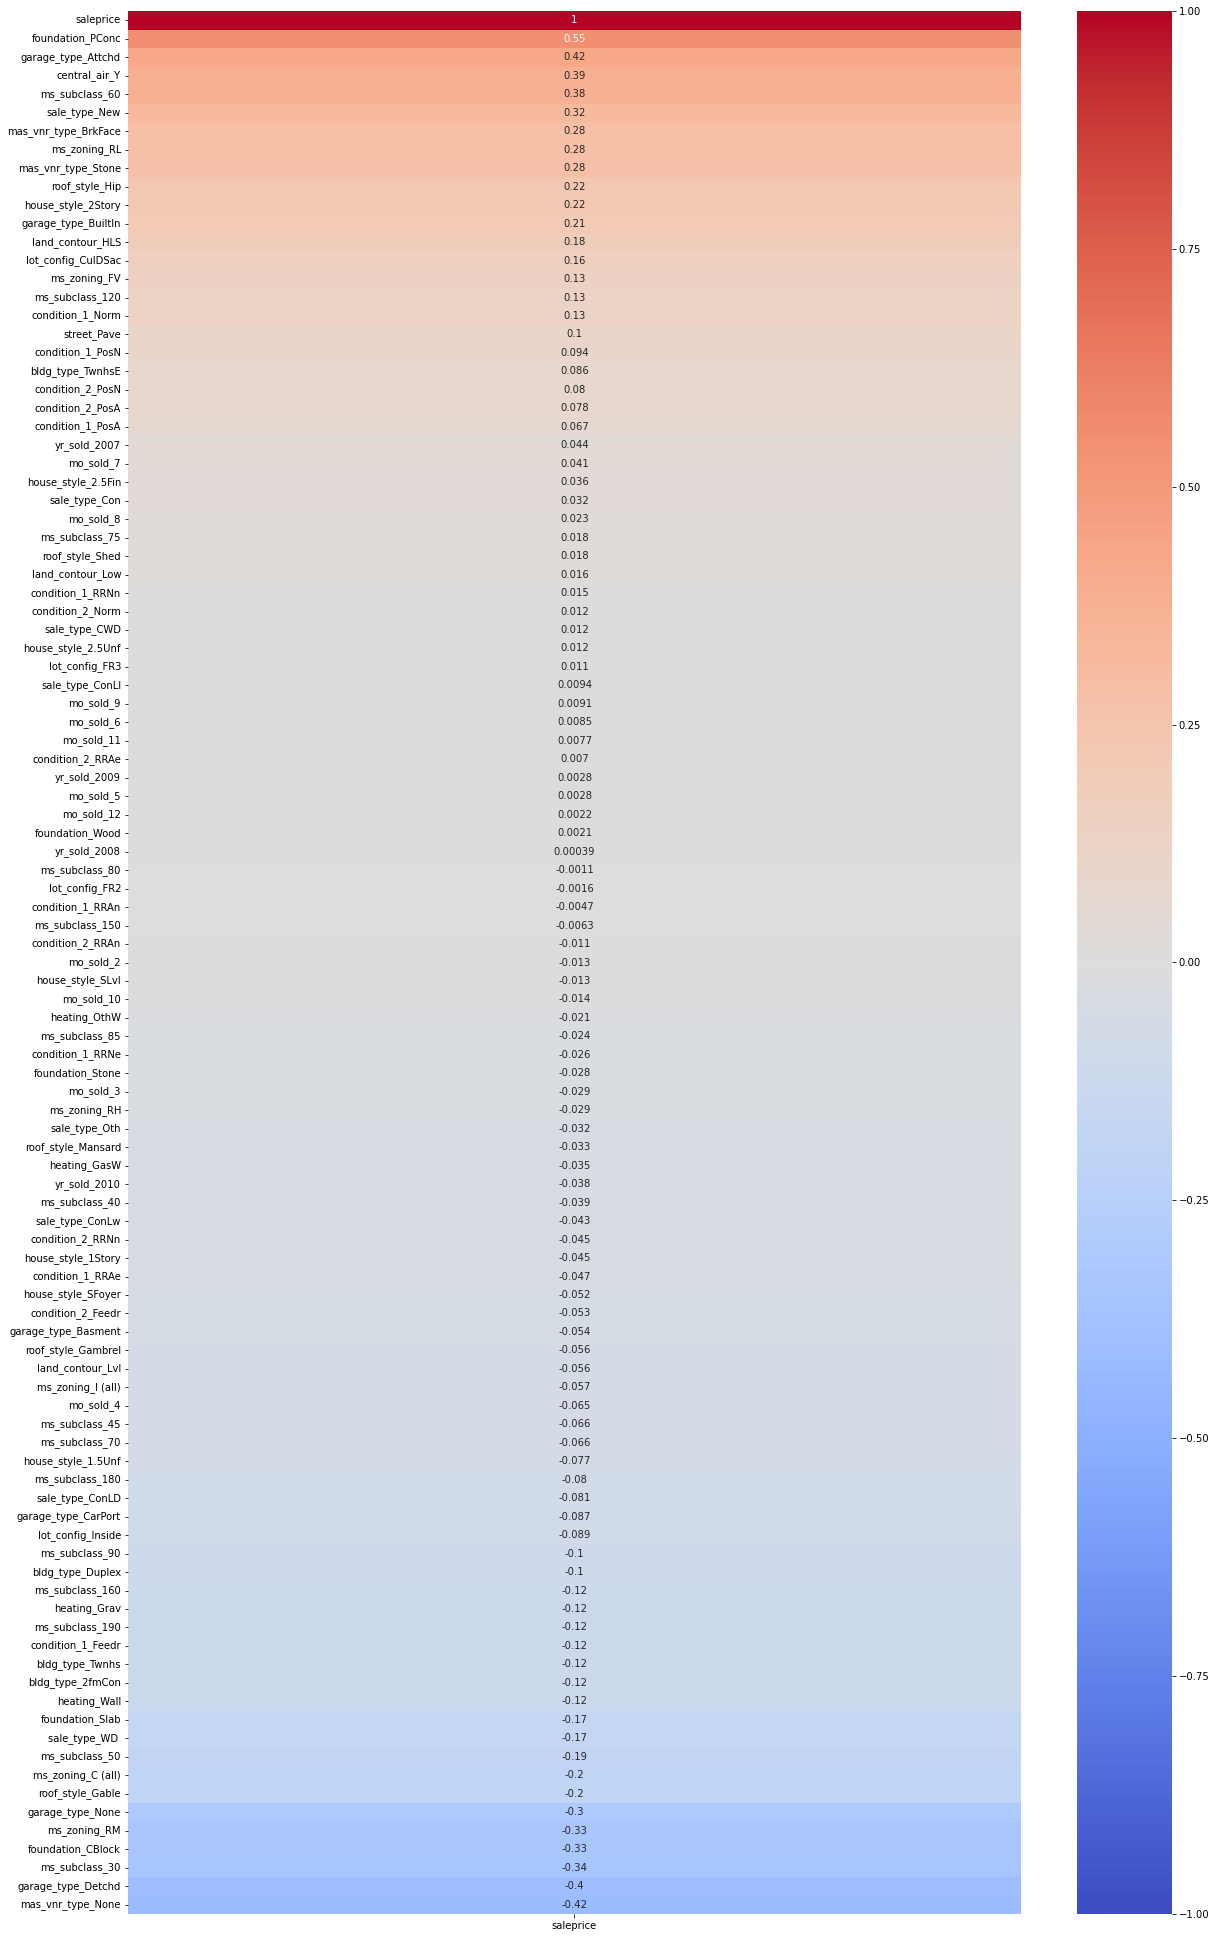

In [54]:
# take a look at the correlation between numerical columns and saleprice
plt.figure(figsize = (20, 35))
sns.heatmap(dummy_coeff.corr()[['saleprice']].sort_values('saleprice', ascending = False), 
            annot=True, cmap ='coolwarm', vmin=-1, vmax=1);

plt.savefig('../charts/dummy_heatmap.jpg')

In [55]:
corr = dummy_coeff.corr()
#Correlation with output variable
corr_target = abs(corr["saleprice"])
#Selecting highly correlated features
select_features = corr_target[corr_target>=0.30]
select_features

saleprice             1.000000
ms_subclass_30        0.344183
ms_subclass_60        0.376520
ms_zoning_RM          0.330631
mas_vnr_type_None     0.416234
foundation_CBlock     0.332656
foundation_PConc      0.549287
central_air_Y         0.387008
garage_type_Attchd    0.423275
garage_type_Detchd    0.399712
sale_type_New         0.319985
Name: saleprice, dtype: float64

Similar as the numeric features, we will also use a threshold of coefficient of >= 0.30 for categorical features against saleprice. Features that can be considered to be included into the prediction model are:<br>'ms_subclass_30', 'ms_subclass_60', 'ms_zoning_RM', 'mas_vnr_type_None', 'foundation_PConc', 'foundation_CBlock', 'central_air_Y', 'garage_type_Attchd', 'garage_type_Detchd' and 'sale_type_New'. 

### Numerical Features
We will create a list of features with correlation coefficient of 0.35 and above.

In [56]:
numerical = ['house_area', 'total_bath', 'garage_area', 'house_age', 'year_remod/add', 'totrms_abvgrd', 'mas_vnr_area']

In [57]:
ordinal_features = ['overall_qual', 'location', 'kitchen_qual', 'bsmt_qual', 'garage_finish', 'garage_qual', 'fireplace_qu', 'heating_qc', 
                    'paved_drive', 'bsmt_exposure']

### Categorical Features

In [58]:
categorical_features = ['ms_subclass_60', 'foundation_PConc', 'ms_zoning_RL', 'mas_vnr_type_Stone', 'mas_vnr_type_BrkFace', 'central_air_Y', 'sale_type_New', 'garage_type_Attchd']

### SelectKBest

Scikit-learn API provides SelectKBest class for extracting best features of a given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time.

Since `saleprice` is a continuous data, we will use `score_func = 'f_regression'` here.

SelecKBest codes adapted from: ([*source*](https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le))

In [59]:
print(train.columns.tolist())

['id', 'lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'year_remod/add', 'mas_vnr_area', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'low_qual_fin_sf', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplace_qu', 'garage_yr_blt', 'garage_finish', 'garage_area', 'garage_qual', 'paved_drive', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'saleprice', 'house_age', 'house_area', 'location', 'total_bath', 'ms_subclass_30', 'ms_subclass_40', 'ms_subclass_45', 'ms_subclass_50', 'ms_subclass_60', 'ms_subclass_70', 'ms_subclass_75', 'ms_subclass_80', 'ms_subclass_85', 'ms_subclass_90', 'ms_subclass_120', 'ms_subclass_150', 'ms_subclass_160', 'ms_subclass_180', 'ms_subclass_190', 'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM', 'street_Pave', 

In [60]:
train_automated = train[train.columns.tolist()]
train_automated

id  lot_frontage  lot_area  lot_shape  utilities  land_slope  \
0      109          70.0     13517          3          4           3   
1      544          43.0     11492          3          4           3   
2      153          68.0      7922          4          4           3   
3      318          73.0      9802          4          4           3   
4      255          82.0     14235          3          4           3   
...    ...           ...       ...        ...        ...         ...   
2043  1587          79.0     11449          3          4           3   
2044   785          63.0     12342          3          4           3   
2045   916          57.0      7558          4          4           3   
2046   639          80.0     10400          4          4           3   
2047    10          60.0      7500          4          4           3   

      overall_qual  overall_cond  year_remod/add  mas_vnr_area  exter_cond  \
0                6             8            2005         289.0           3   
1                7             5            1997         132.0           3   
2                5             7            2007           0.0           4   
3                5             5            2007           0.0           3   
4                6             8            1993           0.0           3   
...            ...           ...             ...           ...         ...   
2043             8             5            2007           0.0           3   
2044             4             5            1950           0.0           3   
2045             6             6            1950           0.0           3   
2046             4             5            1956           0.0           3   
2047             7             5            1999           0.0           3   

      bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  \
0             3          3              1               6               1   
1             4          3              1               6               1   
2             3          3              1               6               1   
3             4          3              1               1               1   
4             2          4              1               1               1   
...         ...        ...            ...             ...             ...   
2043          4          3              4               6               1   
2044          3          3              1               4               1   
2045          3          3              1               1               1   
2046          3          3              1               3               2   
2047          3          3              1               1               1   

      heating_qc  electrical  low_qual_fin_sf  bedroom_abvgr  kitchen_abvgr  \
0              5           5                0              3              1   
1              5           5                0              4              1   
2              3           5                0              3              1   
3              4           5                0              3              1   
4              3           5                0              3              1   
...          ...         ...              ...            ...            ...   
2043           5           5                0              3              1   
2044           5           5                0              1              1   
2045           4           5                0              3              1   
2046           3           5                0              3              1   
2047           4           5                0              3              1   

      kitchen_qual  totrms_abvgrd  functional  fireplace_qu  garage_yr_blt  \
0                4              6           8             0           1976   
1                4              8           8             3           1997   
2                4              5           8             0           1953   
3                3  

In [61]:
X = train_automated.drop('saleprice', axis=1)
y = train_automated['saleprice']
print(X.shape)
print(y.shape)

(2048, 141)
(2048,)


After trying to set different numbers to k, it seems like 32 features using SelectKBest gives a more optimal result in terms on modeling scores. (modeling is done in the modeling notebook)

#### SelectKBest (k=32)

In [62]:
selector = SelectKBest(score_func = f_regression, k = 32)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['feature_names', 'f_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['f_Scores', 'feature_names'], ascending = [False, True])
print(ns_df_sorted)

         feature_names     f_Scores
1         overall_qual  4379.335276
19          house_area  4008.622082
20            location  1903.645134
8         kitchen_qual  1788.710170
21          total_bath  1588.988375
13         garage_area  1535.919662
4            bsmt_qual  1440.423051
18           house_age  1303.202081
11       garage_yr_blt  1211.881373
2       year_remod/add  1148.429289
12       garage_finish  1141.211264
27    foundation_PConc   884.042479
10        fireplace_qu   851.670373
7           heating_qc   688.863949
9        totrms_abvgrd   685.739104
3         mas_vnr_area   515.775270
29  garage_type_Attchd   446.572931
25   mas_vnr_type_None   428.751976
30  garage_type_Detchd   389.047253
15         paved_drive   374.330111
5        bsmt_exposure   370.794767
28       central_air_Y   360.421987
6       bsmtfin_type_1   357.589409
23      ms_subclass_60   337.967992
14         garage_qual   311.456457
0         lot_frontage   283.942397
22      ms_subclass_30   274

In [63]:
X.columns.values[selector.get_support()]

array(['lot_frontage', 'overall_qual', 'year_remod/add', 'mas_vnr_area',
       'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc',
       'kitchen_qual', 'totrms_abvgrd', 'fireplace_qu', 'garage_yr_blt',
       'garage_finish', 'garage_area', 'garage_qual', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'house_age', 'house_area',
       'location', 'total_bath', 'ms_subclass_30', 'ms_subclass_60',
       'ms_zoning_RM', 'mas_vnr_type_None', 'foundation_CBlock',
       'foundation_PConc', 'central_air_Y', 'garage_type_Attchd',
       'garage_type_Detchd', 'sale_type_New'], dtype=object)

Select a higher number of features for the purpose of showing how 40 features will fair against 32 features in the modeling notebook.

#### SelectKBest (k=40)

In [64]:
selector = SelectKBest(score_func = f_regression, k = 40)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['feature_names', 'f_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['f_Scores', 'feature_names'], ascending = [False, True])
print(ns_df_sorted)

           feature_names     f_Scores
3           overall_qual  4379.335276
23            house_area  4008.622082
24              location  1903.645134
12          kitchen_qual  1788.710170
25            total_bath  1588.988375
17           garage_area  1535.919662
6              bsmt_qual  1440.423051
22             house_age  1303.202081
15         garage_yr_blt  1211.881373
4         year_remod/add  1148.429289
16         garage_finish  1141.211264
34      foundation_PConc   884.042479
14          fireplace_qu   851.670373
10            heating_qc   688.863949
13         totrms_abvgrd   685.739104
5           mas_vnr_area   515.775270
36    garage_type_Attchd   446.572931
31     mas_vnr_type_None   428.751976
37    garage_type_Detchd   389.047253
19           paved_drive   374.330111
8          bsmt_exposure   370.794767
35         central_air_Y   360.421987
9         bsmtfin_type_1   357.589409
27        ms_subclass_60   337.967992
18           garage_qual   311.456457
0           

In [65]:
X.columns.values[selector.get_support()]

array(['lot_frontage', 'lot_area', 'lot_shape', 'overall_qual',
       'year_remod/add', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_type_1', 'heating_qc', 'electrical',
       'kitchen_qual', 'totrms_abvgrd', 'fireplace_qu', 'garage_yr_blt',
       'garage_finish', 'garage_area', 'garage_qual', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'house_age', 'house_area',
       'location', 'total_bath', 'ms_subclass_30', 'ms_subclass_60',
       'ms_zoning_RL', 'ms_zoning_RM', 'mas_vnr_type_BrkFace',
       'mas_vnr_type_None', 'mas_vnr_type_Stone', 'foundation_CBlock',
       'foundation_PConc', 'central_air_Y', 'garage_type_Attchd',
       'garage_type_Detchd', 'garage_type_None', 'sale_type_New'],
      dtype=object)